In [267]:
import torch
import torch.nn.functional as F
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, Softmax, ReLU, LeakyReLU, Module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.interpolate import make_interp_spline, BSpline

In [268]:
df = pd.read_csv('elapsed-time-experimental-group.csv')
df

,vms,elapsed
0,10,19.7
1,10,17.7
2,10,30.2
3,20,28.7
4,20,35.0
5,20,27.5
6,30,44.3
7,30,41.1
8,40,69.2
9,40,53.1


In [269]:
df = df.dropna() # drop all rows that have NAN/none

In [270]:
df.corr()

,vms,elapsed
vms,1.000000,0.915895
elapsed,0.915895,1.000000


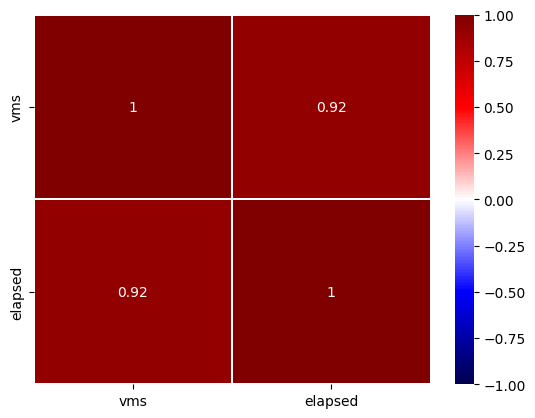

In [271]:
# plt.figure(figsize=(10,10))
sb.heatmap( df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='seismic' )
plt.show()

In [272]:
df = df.dropna() # drop all rows that have NAN/none
# df.insert(0, "squared_vms", df['vms']**2, True)
df

,vms,elapsed
0,10,19.7
1,10,17.7
2,10,30.2
3,20,28.7
4,20,35.0
5,20,27.5
6,30,44.3
7,30,41.1
8,40,69.2
9,40,53.1


In [273]:
x_data = df.iloc[:,:1].values # 0, 1 열 (x^2 + x)
y_data = df.iloc[:,[-1]].values  # 마지막 열만
print(x_data.shape)

(13, 1)


In [274]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform( x_data )

scaleL = MinMaxScaler()
y_dataN = scaleL.fit_transform( y_data )
y_dataN.shape

x_dataN

array([[0.  ],
       [0.  ],
       [0.  ],
       [0.25],
       [0.25],
       [0.25],
       [0.5 ],
       [0.5 ],
       [0.75],
       [0.75],
       [0.75],
       [1.  ],
       [1.  ]])

In [275]:
x = torch.FloatTensor(x_dataN) # 특성 데이터
y = torch.FloatTensor(y_dataN) # 라벨

In [276]:
class ExpModel(Module):
    def __init__(self):
        super().__init__()
        self.fc1 = Linear(1,1)
    
    def forward(self, x):        
        x = self.fc1(x)
        
        return x   

In [277]:
# model = Sequential()
# model.add_module('nn1', Linear(1,1))
model = ExpModel()
list(model.parameters())

[Parameter containing:
 tensor([[-0.4270]], requires_grad=True),
 Parameter containing:
 tensor([-0.4042], requires_grad=True)]

In [278]:
loss_fn = MSELoss()
optimizer = Adam(model.parameters())

In [279]:
hist = []
for step in range(4000):
    optimizer.zero_grad()
    hx = model.forward(x) # w*x+b # hx = model(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    if step % 100 == 0:
        print(step, cost.item())
    hist.append(cost.item())

0 1.1142890453338623
1000 0.06328403204679489
2000 0.03137413412332535
3000 0.019430430606007576


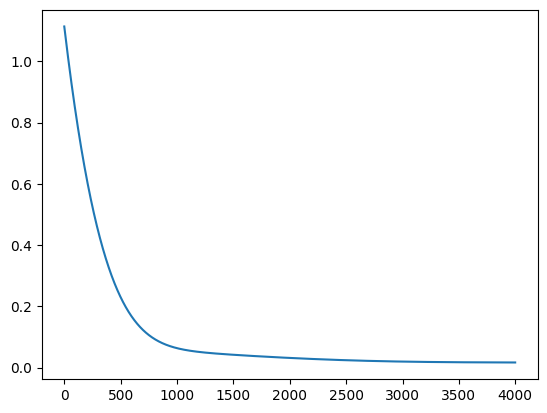

In [280]:
plt.plot(hist)
plt.show()

In [281]:
list(model.parameters())

[Parameter containing:
 tensor([[0.7886]], requires_grad=True),
 Parameter containing:
 tensor([-0.0123], requires_grad=True)]

In [282]:
# Dummy data to draw smooth graph
x_axis = np.linspace(1,50,50) # [ 1 , 2, 3, 4, ...., 50]
x_dummy = [[xval] for xval in x_axis]
scaleF = MinMaxScaler()
x_dummyN = scaleF.fit_transform( x_dummy )

predN = model(torch.FloatTensor(x_dummyN)).detach().numpy()
pred = scaleL.inverse_transform(predN)
pred

array([[16.599174],
       [18.0348  ],
       [19.470423],
       [20.906046],
       [22.34167 ],
       [23.777292],
       [25.212917],
       [26.64854 ],
       [28.084164],
       [29.519785],
       [30.95541 ],
       [32.391033],
       [33.826656],
       [35.26228 ],
       [36.697906],
       [38.133526],
       [39.569153],
       [41.004776],
       [42.4404  ],
       [43.876022],
       [45.31165 ],
       [46.74727 ],
       [48.182896],
       [49.61852 ],
       [51.054142],
       [52.48977 ],
       [53.92539 ],
       [55.36101 ],
       [56.796635],
       [58.23226 ],
       [59.667885],
       [61.10351 ],
       [62.53913 ],
       [63.974754],
       [65.41038 ],
       [66.846   ],
       [68.281624],
       [69.71725 ],
       [71.15287 ],
       [72.58849 ],
       [74.024124],
       [75.45975 ],
       [76.89536 ],
       [78.330986],
       [79.76662 ],
       [81.20223 ],
       [82.63786 ],
       [84.07349 ],
       [85.50911 ],
       [86.94473 ]],

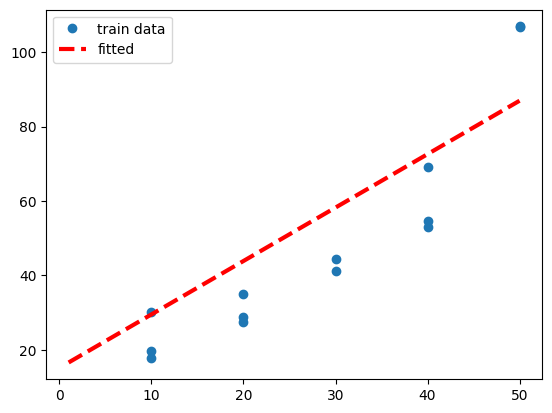

In [283]:
# plt.ylim([0, 25000])
plt.plot(x_data[:,[0]], y_data, 'o', label='train data')
# plt.scatter(x_data, y_data)
# plt.plot(x_data[:,1], np.exp(model(x).data.numpy()), '-r', linewidth=3, label='fitted') # r-- : Red, dashed line

plt.plot(x_axis, pred, 'r--', linewidth=3, label='fitted') # r-- : Red, dashed line
# plt.grid()
plt.legend()
plt.show()